In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df.shape

(13320, 9)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [9]:
df1 = df[['location', 'size', 'total_sqft', 'bath', 'price']]

In [10]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df1.isnull().sum() 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df1=df1.dropna()

In [13]:
df1['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [14]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split()[0]))

In [15]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
def convertfloat(value):
    try:
        x=float(value)
    except:
        splitval=value.split("-")
        if len(splitval)==2:
            x1,x2=splitval
            x = (float(x1)+float(x2))/2
        else:
            x = np.nan
    return x

In [17]:
df2=df1.copy()

In [18]:
df2['total_sqft']=df2['total_sqft'].apply(lambda x: convertfloat(x))

In [19]:
df2= df2.dropna()

<AxesSubplot:xlabel='bhk', ylabel='total_sqft'>

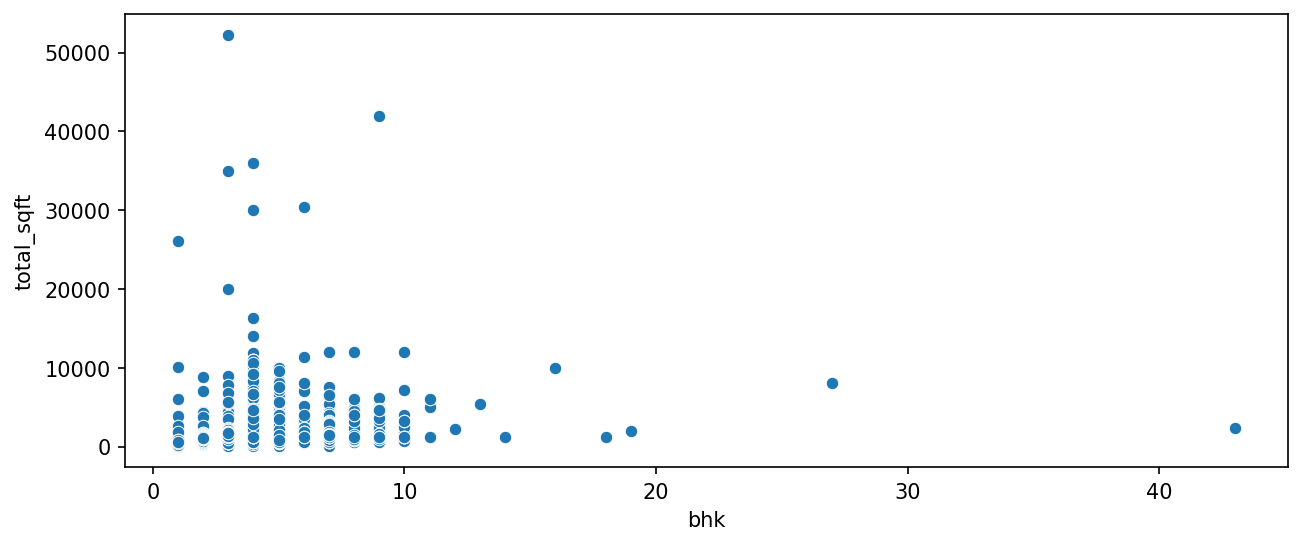

In [41]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df2,x='bhk',y='total_sqft')

In [21]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000.0,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43


In [22]:
df2['price_per_sqrft']=(df2.price*100000)/df2.total_sqft

In [23]:
df2.price_per_sqrft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqrft, dtype: float64

In [24]:
df2.to_csv("sample.csv")

In [25]:
df2.location = df2.location.apply(lambda x: x.strip())
locationstats=df2.location.value_counts()
locationstats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [26]:
sum(locationstats[(locationstats.values<10)].values)

2732

In [27]:
sum(locationstats.values)

13200

In [28]:
location_less_than_10=locationstats[(locationstats.values<10)].index

In [29]:
df3=df2.copy()

In [30]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df3.location.unique())

255

In [31]:
df3["location"]= df3["location"].str.upper().str.title()
len(df3.location.unique())

255

In [32]:
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqrft'],
      dtype='object')

Normally a bhk has a minimum 300 sqft.

In [33]:
len(df3[df3.total_sqft/df3.bhk<300])

744

In [34]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]

In [35]:
df4.shape

(12456, 7)

In [36]:
df4[df4.bath==df4.bhk+2].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrft
84,Epip Zone,3 BHK,1499.0,5.0,102.0,3,6804.536358
209,Padmanabhanagar,4 Bedroom,1736.0,6.0,190.0,4,10944.700461
337,Thigalarapalya,4 BHK,3122.0,6.0,230.0,4,7367.072389
490,Old Madras Road,5 BHK,4500.0,7.0,337.0,5,7488.888889
524,Jakkur,4 BHK,5230.0,6.0,465.0,4,8891.013384


Removing outliers of baths having more than number of bhk  + 2

In [37]:
len(df4[df4.bath==df4.bhk+2])

144

In [38]:
df5=df4[~(df4.bath==df4.bhk+2)]

<AxesSubplot:xlabel='bhk', ylabel='total_sqft'>

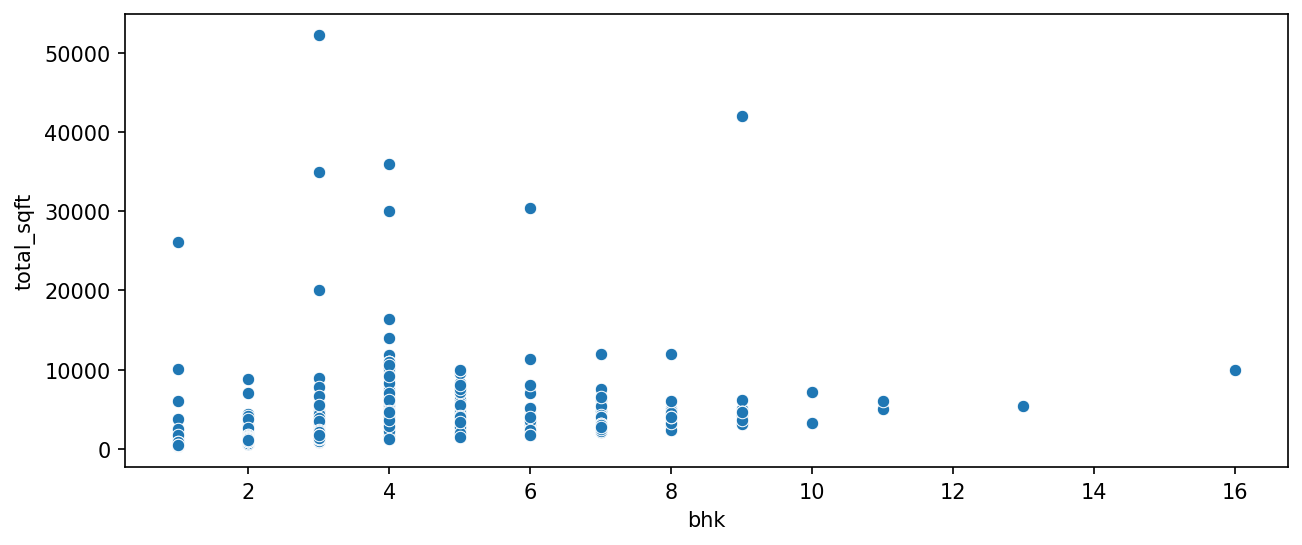

In [40]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df5,x='bhk',y='total_sqft')

<AxesSubplot:xlabel='bhk', ylabel='total_sqft'>

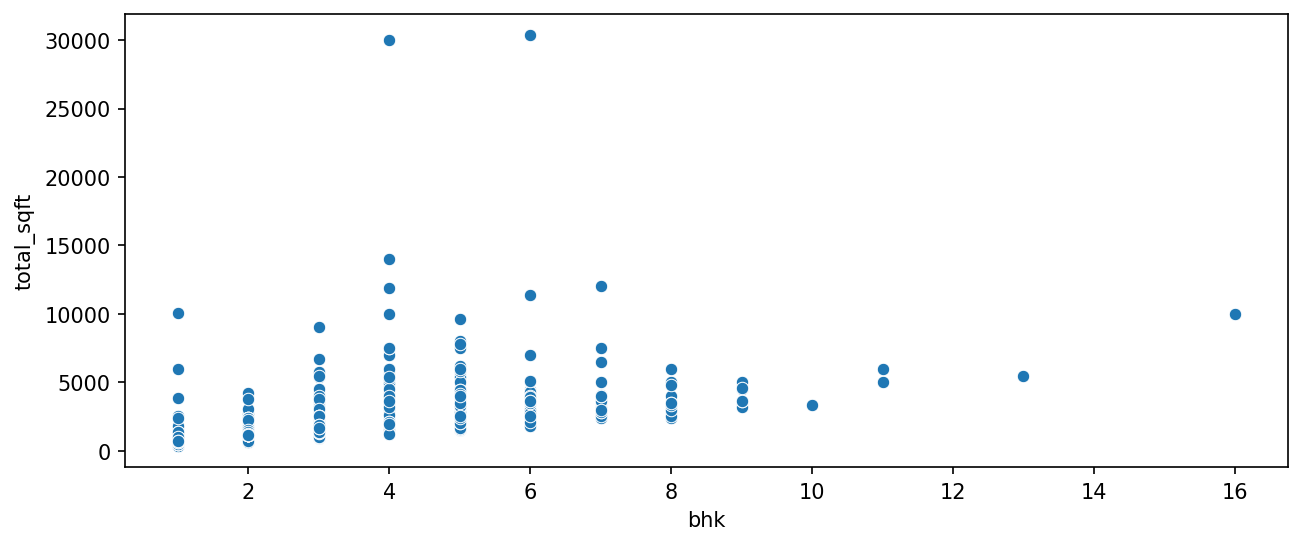

In [48]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrft)
        st = np.std(subdf.price_per_sqrft)
        reduced_df = subdf[(subdf.price_per_sqrft>(m-st)) & (subdf.price_per_sqrft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df6,x='bhk',y='total_sqft')